# Inverter Phaseleg Loss Breakdown Analysis
                                                       
**GaN Systems Applications Engineering**

In [1]:
#Python Library: 

import numpy as np
from math import *
from pandas import DataFrame
from sympy import *
import matplotlib.pyplot as plt

,System Total Power (kW),BackEMF(Vrms),Load Current (Arms),BUS Voltage (V)
,2.829*sqrt(3),230,12.3,500


,Switching frequency(kHz),Dead time (nS),Ambient temperature (C)
,20.0,100.0,55


ValueError: x and y must have same first dimension, but have shapes (2000,) and (1,)

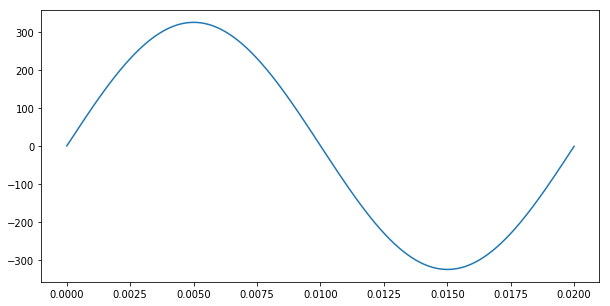

In [2]:
#System Parameters:
VBUS = 500                        #BUS Voltage
IL = 12.3                         #Load Current (RMS) 
fL = 50                           #Line Frequency
VEMF = 230                       #BACK EMF (line-line,RMS)
PT = 3*VEMF*IL/sqrt(3)

def vin(t):
    v= VBUS
    return v

def vout(t):
    v= 1.414*VEMF*np.sin(2*3.14*fL*t)
    return v

#Switch Parameters:
fsw = 20e3                       #Switching frequency
td = 100e-9                       #Dead time
Ta = 55                           #Ambient temperature
Rthja = 5                         #Junction to ambient thermal resistance
#System Parameters table:
System_Parameters ={'System Total Power (kW)':[PT/1e3],'BackEMF(Vrms)':[VEMF],'Load Current (Arms)':[IL],'BUS Voltage (V)':[VBUS]}
System_Parameters_table = DataFrame(System_Parameters, index =[' ']) # creating a data frame
display (System_Parameters_table) 

#Switch Parameters table:
Switch_Parameters ={'Switching frequency(kHz)':[fsw/1e3],'Dead time (nS)':[td*1e9],'Ambient temperature (C)':[Ta]}
Switch_Parameters_table = DataFrame(Switch_Parameters, index =[' ']) # creating a data frame
display (Switch_Parameters_table)

fig, axes = plt.subplots(figsize=(10,5))
time= np.linspace(0, 1/fL, 2000)
plt.plot(time,vout(time))
plt.plot(time,vin(time))
axes.set_xlabel('Time (s)')
axes.set_ylabel('Input Current (A)')
axes.set_title('Inductor Current Waveform');


In [ ]:
vout(1/200)

In [ ]:
#System Operation Rules:
psw = 1 / fsw           #switching period
pL = 1 / fL             #line period
L = 1000e-6           #Equivalent output inductor 

#Inductor current sampling for conduction loss analysis
iLarr = [0]    #Instantaneous inductor current  
tarr  = [0]    #Time

#Switching condition sampling for switching loss analysis
ion   = [0]    #Switching-on current
ioff  = [0]    #Switching-off current
vds   = [0]    #Switch voltage


#local variables for loss analysis: 
t = 0                 #time
iL_sw = 0               #switching current

while t<= pL/2: 
    iL_av = 1.414 * IL * sin (2*pi * fL * t)
    vout = 1.414 * VEMF * sin (2*pi * fL * t)
    iL_sw = iL_av + (1 - vout / VBUS) * psw * vout / L / 2
    t = t + (1 - vout / VBUS) * psw
    iLarr.append(iL_sw)
    ion.append(abs(iL_sw))
    vds.append(VBUS)
    tarr.append(t)
    iL_sw = iL_av - (1 - vout / VBUS) * psw * vout / L / 2
    t = t + vout / VBUS * psw
    iLarr.append(iL_sw)
    ioff.append(abs(iL_sw))
    tarr.append(t)
    
while t<= pL: 
    iL_av = 1.414 * IL * sin (2*pi * fL * t)
    vout = 1.414 * VEMF * sin (2*pi * fL * t)
    iL_sw = iL_av - (1 - abs(vout) / VBUS) * psw * abs(vout) / L / 2
    t = t + (1 - abs(vout) / VBUS) * psw
    iLarr.append(iL_sw)
    ion.append(abs(iL_sw))
    vds.append(VBUS)
    tarr.append(t)
    iL_sw = iL_av + (1 - abs(vout) / VBUS) * psw * abs(vout) / L / 2
    t = t + abs(vout) / VBUS * psw
    iLarr.append(iL_sw)
    ioff.append(abs(iL_sw))
    tarr.append(t)

In [ ]:
fig, axes = plt.subplots(figsize=(10,5))
plt.plot(tarr,iLarr)
axes.set_xlabel('Time (s)')
axes.set_ylabel('Input Current (A)')
axes.set_title('Inductor Current Waveform');

In [ ]:
def Esw_cal_GS66508(vds):
    a=vds.pop()
    return a

a = Esw_cal_GS66508(vds)
print(vds)
print(a)